In [1]:
import pandas as pd
import numpy as np

#### Setting up a 1-D array

In [2]:
X = np.array([-7, 2, -3, -11, 14, 6, 8])

#### Discretization in pandas

https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html

In [3]:
categories = pd.cut(X, 4)

categories

[(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]]

In [4]:
categories.categories

IntervalIndex([(-11.025, -4.75], (-4.75, 1.5], (1.5, 7.75], (7.75, 14.0]], dtype='interval[float64, right]')

In [5]:
categories.codes

array([0, 2, 1, 0, 3, 2, 3], dtype=int8)

In [6]:
categories.ordered

True

#### This time we are setting retbins parameter to True so it will also return the bins

In [7]:
pd.cut(X, 4, retbins=True)

([(-11.025, -4.75], (1.5, 7.75], (-4.75, 1.5], (-11.025, -4.75], (7.75, 14.0], (1.5, 7.75], (7.75, 14.0]]
 Categories (4, interval[float64, right]): [(-11.025, -4.75] < (-4.75, 1.5] < (1.5, 7.75] < (7.75, 14.0]],
 array([-11.025,  -4.75 ,   1.5  ,   7.75 ,  14.   ]))

#### Specifing the labels for the returned bins

In [8]:
marks = np.array([70, 20, 30, 99, 40, 16, 80])

In [9]:
categories, bins = pd.cut(marks, 4, retbins=True, labels=['poor', 'average', 'good', 'excellent'])

In [10]:
categories

['good', 'poor', 'poor', 'excellent', 'average', 'poor', 'excellent']
Categories (4, object): ['poor' < 'average' < 'good' < 'excellent']

In [11]:
categories.categories

Index(['poor', 'average', 'good', 'excellent'], dtype='object')

In [12]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

#### Passing a Series as an input returns a Series with mapping value

In [13]:
df = pd.Series(marks, index = [1, 2, 3, 4, 5, 6, 7])

df

1    70
2    20
3    30
4    99
5    40
6    16
7    80
dtype: int64

In [14]:
categories, bins = pd.cut(df, 4, retbins=True)

In [15]:
categories

1      (57.5, 78.25]
2    (15.917, 36.75]
3    (15.917, 36.75]
4      (78.25, 99.0]
5      (36.75, 57.5]
6    (15.917, 36.75]
7      (78.25, 99.0]
dtype: category
Categories (4, interval[float64, right]): [(15.917, 36.75] < (36.75, 57.5] < (57.5, 78.25] < (78.25, 99.0]]

In [16]:
bins

array([15.917, 36.75 , 57.5  , 78.25 , 99.   ])

### KBinsDiscretizer
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html

In [17]:
from sklearn.preprocessing import KBinsDiscretizer

#### Setting up a 2-D array

In [20]:
marks = [[70], [20], [30], [99], [40], [16], [80]]

#### Here strategy = 'uniform' so all bins in each feature have identical widths.

In [18]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')

In [21]:
enc.fit(marks)

KBinsDiscretizer(encode='ordinal', n_bins=4, strategy='uniform')

In [22]:
enc.transform(marks)

array([[2.],
       [0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.]])

#### Edges of each bin

In [23]:
enc.bin_edges_

array([array([16.  , 36.75, 57.5 , 78.25, 99.  ])], dtype=object)

#### Setting up another 2-D array with -ve values

In [24]:
X = [[-21, 41, -14],
     [-13, 23, -31],
     [  9, 30, -5],
     [  0, 24, -17]]

#### Here strategy = 'quantile' so all bins in each feature have the same number of points.

In [25]:
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
enc.fit(X)

KBinsDiscretizer(encode='ordinal', n_bins=4)

In [26]:
X_trans = enc.transform(X)
X_trans

array([[0., 3., 2.],
       [1., 0., 0.],
       [3., 2., 3.],
       [2., 1., 1.]])

In [27]:
enc.bin_edges_

array([array([-21.  , -15.  ,  -6.5 ,   2.25,   9.  ]),
       array([23.  , 23.75, 27.  , 32.75, 41.  ]),
       array([-31.  , -20.5 , -15.5 , -11.75,  -5.  ])], dtype=object)

##### The inverse_transform function converts the binned data into the original feature space. Each value will be equal to the mean of the two bin edges.

In [28]:
enc.inverse_transform(X_trans)

array([[-18.   ,  36.875, -13.625],
       [-10.75 ,  23.375, -25.75 ],
       [  5.625,  29.875,  -8.375],
       [ -2.125,  25.375, -18.   ]])

#### Now we will build a regression model with original data and with discretized data 

#### Loading the automobiles dataset

In [29]:
automobile_df = pd.read_csv('../datasets/auto_mpg_processed.csv')

automobile_df.head(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,age
0,18.000000,8,307.0,130,3504,307.0,US,49
1,16.000000,8,304.0,150,3433,304.0,US,49
2,17.000000,8,302.0,140,3449,302.0,US,49
3,14.000000,8,454.0,220,4354,454.0,US,49
4,23.551429,8,440.0,215,4312,440.0,US,49
5,14.000000,8,455.0,225,4425,455.0,US,49
6,15.000000,8,390.0,190,3850,390.0,US,49
7,15.000000,8,383.0,170,3563,383.0,US,49
8,14.000000,5,340.0,160,3609,340.0,US,49
9,23.551429,8,400.0,150,3761,400.0,US,49


#### Here we are taking horsepower column as feature and the predicting the mpg value

In [31]:
X = automobile_df[['Horsepower']]
Y = automobile_df['MPG']
X.sample(10)

,Horsepower
211,70
277,129
364,74
111,91
229,83
290,71
340,65
262,105
249,105
92,100


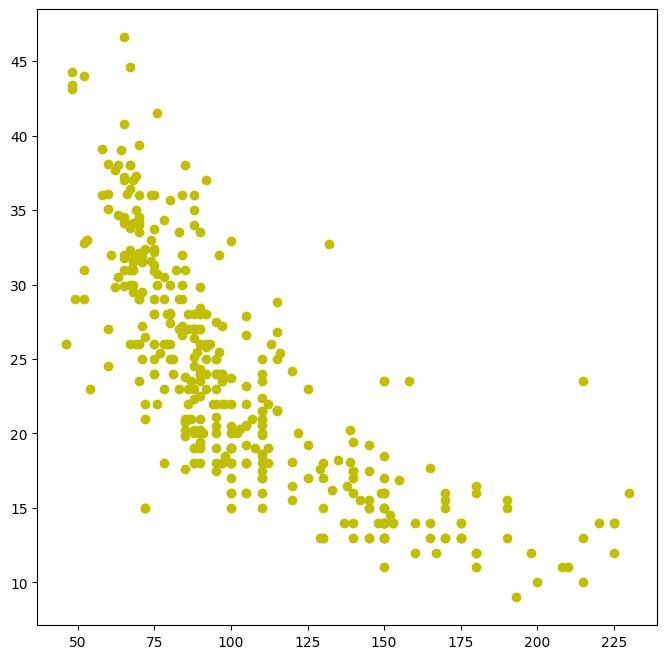

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(X, Y, 'o', c='y')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [34]:
reg = LinearRegression().fit(x_train, y_train)

y_pred = reg.predict(x_test)
y_pred

array([25.1090359 , 30.76957501, 26.24114372, 25.1090359 , 31.90168283,
       25.91768435, 16.37563271, 15.89044365, 29.15227812, 23.49173902,
       29.31400781, 29.4757375 , 12.17066081, 16.21390302,  6.5101217 ,
       29.96092656, 22.19790151, 24.94730621, 24.94730621, 26.88806248,
       11.36201236, 22.68309057, 16.21390302, 28.34362968, 23.00654995,
        5.70147326, 25.1090359 , 17.02255147, 11.36201236, 25.1090359 ,
       29.63746719, 21.71271244, 25.1090359 , 26.72633279, 26.24114372,
       24.30038746, 22.35963119, 22.68309057,  3.27552793, 29.63746719,
       26.24114372, 17.83119991, 24.30038746, 26.72633279, 23.49173902,
       26.72633279, 28.82881874, 25.91768435,  9.74471548, 17.50774053,
       25.91768435, 24.30038746, 26.24114372, 26.24114372, 25.91768435,
       12.97930925, 26.5646031 , 12.17066081, 16.21390302, 14.59660614,
       16.21390302, 23.49173902, 16.21390302, 31.73995314, 25.59422497,
       28.18189999, 22.68309057, 30.76957501, 28.99054843,  4.89

In [35]:
from sklearn.metrics import r2_score

print("r_2 score: ", r2_score(y_test, y_pred))

r_2 score:  0.5427902625869776


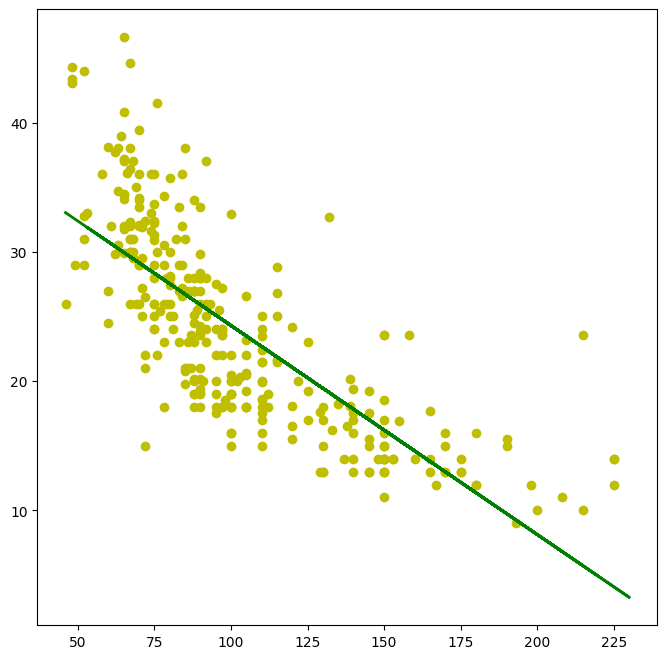

In [36]:
plt.figure(figsize=(8, 8))
plt.plot(x_train, y_train, 'o', c='y')
plt.plot(x_test, y_pred, linewidth=2, color='green', linestyle='-', label='linear regression')

plt.show()

#### Discretizing data with encode='ordinal' and strategy='quantile' (by default)

In [37]:
enc = KBinsDiscretizer(n_bins=20, encode='ordinal')

x_binned = enc.fit_transform(x_train)
x_binned[:10]

array([[18.],
       [19.],
       [16.],
       [ 6.],
       [18.],
       [ 7.],
       [10.],
       [ 8.],
       [10.],
       [ 8.]])

In [38]:
x_test_binned = enc.transform(x_test)
reg = LinearRegression().fit(x_binned, y_train)

y_pred = reg.predict(x_test_binned)
y_pred

array([22.55266274, 34.58920625, 25.83535643, 22.55266274, 34.58920625,
       23.64689397, 15.98727537, 14.89304415, 31.30651256, 20.36420029,
       31.30651256, 32.40074379, 13.79881292, 14.89304415, 13.79881292,
       33.49497502, 19.26996906, 22.55266274, 22.55266274, 26.92958765,
       13.79881292, 19.26996906, 14.89304415, 29.11805011, 20.36420029,
       13.79881292, 22.55266274, 15.98727537, 13.79881292, 22.55266274,
       32.40074379, 19.26996906, 22.55266274, 26.92958765, 25.83535643,
       21.45843151, 19.26996906, 19.26996906, 13.79881292, 32.40074379,
       25.83535643, 17.0815066 , 21.45843151, 26.92958765, 20.36420029,
       26.92958765, 30.21228134, 23.64689397, 13.79881292, 17.0815066 ,
       23.64689397, 21.45843151, 25.83535643, 25.83535643, 23.64689397,
       14.89304415, 26.92958765, 13.79881292, 14.89304415, 14.89304415,
       14.89304415, 20.36420029, 14.89304415, 34.58920625, 23.64689397,
       29.11805011, 19.26996906, 34.58920625, 31.30651256, 13.79

In [39]:
r2_score(y_test, y_pred)

0.6558774019474329

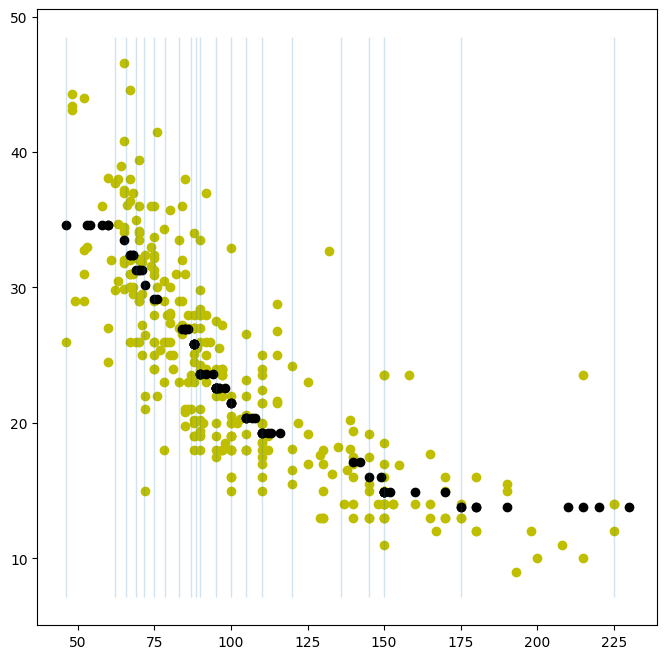

In [40]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='y')
plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.show()

#### Discretizing data with encode='onehot' and strategy='quantile' (by default)

In [41]:
enc = KBinsDiscretizer(n_bins=20, encode='onehot')

x_binned = enc.fit_transform(x_train)

In [42]:
x_binned.toarray()[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [43]:
x_test_binned = enc.transform(x_test)

In [44]:
reg = LinearRegression().fit(x_binned, y_train)

In [45]:
y_pred = reg.predict(x_test_binned)

y_pred

array([22.01126973, 34.21333388, 23.95946436, 22.01126973, 34.21333388,
       24.92297619, 15.31428571, 15.38408163, 31.2375001 , 20.67777776,
       31.2375001 , 32.99333275, 13.29714307, 15.38408163, 13.29714307,
       35.50000012, 20.86818181, 22.01126973, 22.01126973, 27.38333323,
       13.29714307, 20.86818181, 15.38408163, 28.6173913 , 20.67777776,
       13.29714307, 22.01126973, 15.31428571, 13.29714307, 22.01126973,
       32.99333275, 20.86818181, 22.01126973, 27.38333323, 23.95946436,
       19.60625006, 20.86818181, 20.86818181, 13.29714307, 32.99333275,
       23.95946436, 16.56999999, 19.60625006, 27.38333323, 20.67777776,
       27.38333323, 27.18749999, 24.92297619, 13.29714307, 16.56999999,
       24.92297619, 19.60625006, 23.95946436, 23.95946436, 24.92297619,
       15.38408163, 27.38333323, 13.29714307, 15.38408163, 15.38408163,
       15.38408163, 20.67777776, 15.38408163, 34.21333388, 24.92297619,
       28.6173913 , 20.86818181, 34.21333388, 31.2375001 , 13.29

In [46]:
r2_score(y_test, y_pred)

0.6620652947631214

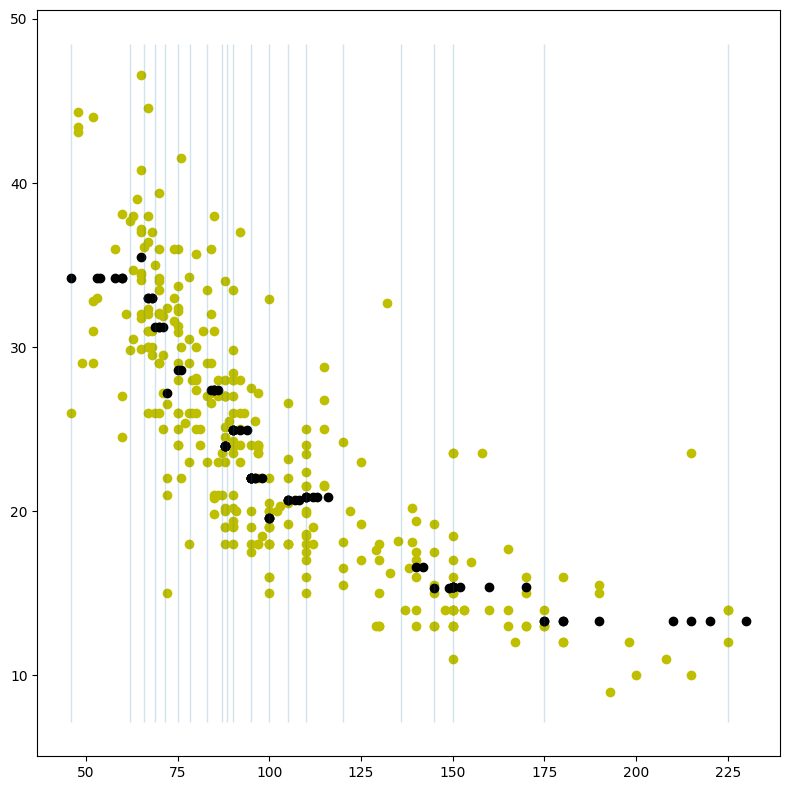

In [47]:
plt.figure(figsize=(8, 8))

plt.scatter(x_train, y_train, c='y')

plt.scatter(x_test, y_pred, color='k')

plt.vlines(enc.bin_edges_[0], *plt.gca().get_ylim(), linewidth=1, alpha=.2)

plt.tight_layout()